In [ ]:
import sys
!pip install pyspellchecker

     |████████████████████████████████| 2.7MB 9.0MB/s 


In [ ]:
!pip install --upgrade plotly

     |████████████████████████████████| 13.2MB 10.0MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
import pandas as pd
import seaborn as sns
import re
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px
import string
import nltk
nltk.download('vader_lexicon')
import warnings 

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


##Reading the CSV files

In [ ]:
df_train = pd.read_csv('https://raw.githubusercontent.com/ErnestSackey/Twitter-Sentiment/main/train_E6oV3lV.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/ErnestSackey/Twitter-Sentiment/main/test_tweets_anuFYb8.csv')
df_sample = pd.read_csv('https://raw.githubusercontent.com/ErnestSackey/Twitter-Sentiment/main/sample_submission_gfvA5FD.csv') 

In [ ]:
df_train.head()

id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation

In [ ]:
df_test.head()

id                                              tweet
0  31963  #studiolife #aislife #requires #passion #dedic...
1  31964   @user #white #supremacists want everyone to s...
2  31965  safe ways to heal your #acne!!    #altwaystohe...
3  31966  is the hp and the cursed child book up for res...
4  31967    3rd #bihday to my amazing, hilarious #nephew...

In [ ]:
df_train.describe()

id         label
count  31962.000000  31962.000000
mean   15981.500000      0.070146
std     9226.778988      0.255397
min        1.000000      0.000000
25%     7991.250000      0.000000
50%    15981.500000      0.000000
75%    23971.750000      0.000000
max    31962.000000      1.000000

In [ ]:
df_train.tweet.unique()

array([' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
       "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
       '  bihday your majesty', ...,
       '  to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm. #shame #imwithher',
       'listening to sad songs on a monday morning otw to work is sad  ',
       'thank you @user for you follow  '], dtype=object)

In [ ]:
df_train.tweet.nunique() #Checking the number of unique tweets

29530

In [ ]:
df_train['tweet'].dtype #Checking the data type which shows it's object

dtype('O')

In [ ]:
df_train.isna().sum() #Checking if there are empty values in the train data

id       0
label    0
tweet    0
dtype: int64

In [ ]:
df_test.isna().sum() #Checking if there are empty values in the test data

id       0
tweet    0
dtype: int64

In [ ]:
#Why is the nunique is not the same as the count if there are no duplicates.
dupli = df_train.duplicated()
print(dupli.any())

False


In [ ]:
df_test.describe()

id
count  17197.000000
mean   40561.000000
std     4964.490625
min    31963.000000
25%    36262.000000
50%    40561.000000
75%    44860.000000
max    49159.000000

##Data Cleaning

In [ ]:
#Concatinating the train and test data so both can be cleanse together: A new column (Dateset) created to indicate where each row belongs
df_train['Dataset'] = 'train'
df_test['Dataset'] = 'test'
df_full = pd.concat([df_train, df_test])
df_full.head()

id  label                                              tweet Dataset
0   1    0.0   @user when a father is dysfunctional and is s...   train
1   2    0.0  @user @user thanks for #lyft credit i can't us...   train
2   3    0.0                                bihday your majesty   train
3   4    0.0  #model   i love u take with u all the time in ...   train
4   5    0.0             factsguide: society now    #motivation   train

In [ ]:
len(df_full)

49159

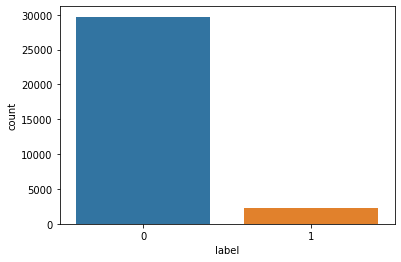

In [ ]:
sns.countplot(x='label',data=df_train)

##Cleaning the Regular Expression

In [ ]:
import string
import re #'re' stand for regular expression (patterns in text)
punc = string.punctuation.replace('#', '').replace('@', '').replace('\'', '')
punc = re.escape(punc)
punc
#This didn't work as planned

'!"\\$%\\&\\(\\)\\*\\+,\\-\\./:;<=>\\?\\[\\\\\\]\\^_`\\{\\|\\}\\~'

## Removing Twitter Handles (@user) and Hashtag tags

In [ ]:
df_full['clean'] = df_full['tweet'].str.replace('\@user', '')
df_full['clean'] = df_full['clean'].str.replace('#', '')

## Removing Punctuations, Numbers, and Special Characters

In [ ]:
df_full['clean'] = df_full['clean'].str.replace("[^a-zA-Z#]", " ") 

## Removing Short Words

In [ ]:
df_full['clean'] = df_full['clean'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3])) 

## Tokenization

In [ ]:
tokenized_tweet = df_full['clean'].apply(lambda x: x.split())
tokenized_tweet

0        [when, father, dysfunctional, selfish, drags, ...
1        [thanks, lyft, credit, cause, they, offer, whe...
2                                  [bihday, your, majesty]
3                          [model, love, take, with, time]
4                        [factsguide, society, motivation]
                               ...                        
17192    [thought, factory, left, right, polarisation, ...
17193    [feeling, like, mermaid, hairflip, neverready,...
17194    [hillary, campaigned, today, ohio, used, words...
17195    [happy, work, conference, right, mindset, lead...
17196    [song, glad, free, download, shoegaze, newmusi...
Name: clean, Length: 49159, dtype: object

In [ ]:
#df_full['clean'] = df_full['tweet'].str.replace(f'[{punc}]', '') #cleaning punctuations
#df_full['clean'] = df_full['clean'].str.replace('\#', '') #cleaning the # key
#df_full['clean'] = df_full['clean'].str.lower() #changing everything to a lower case

In [ ]:
df_full.head(15)

id  label  ... Dataset                                              clean
0    1    0.0  ...   train  when father dysfunctional selfish drags kids i...
1    2    0.0  ...   train  thanks lyft credit cause they offer wheelchair...
2    3    0.0  ...   train                                bihday your majesty
3    4    0.0  ...   train                          model love take with time
4    5    0.0  ...   train                      factsguide society motivation
5    6    0.0  ...   train  huge fare talking before they leave chaos disp...
6    7    0.0  ...   train                             camping tomorrow danny
7    8    0.0  ...   train  next school year year exams think about that s...
8    9    0.0  ...   train  love land allin cavs champions cleveland cleve...
9   10    0.0  ...   train                                       welcome here
10  11    0.0  ...   train  ireland consumer price index climbed from prev...
11  12    0.0  ...   train  selfish orlando standwithorlando pulseshooting...
12  13    0.0  ...   train                        daddy today days gettingfed
13  14    1.0  ...   train  calls michigan middle school build wall chant ...
14  15    1.0  ...   train  comment australia opkillingbay seashepherd hel...

[15 rows x 5 columns]

In [ ]:
#splitting every word in the tweets to form a single list
words = df_full['clean'].str.split()
words = [word for sublist in words for word in sublist]

In [ ]:
len(words)

368337

In [ ]:
#Counting the words to get a hint on the frequency of word
from collections import Counter
word_counts = Counter(words)
word_counts.most_common(20)

[('love', 4273),
 ('this', 4140),
 ('with', 3881),
 ('that', 3194),
 ('your', 2651),
 ('happy', 2651),
 ('have', 2487),
 ('just', 2105),
 ('will', 1953),
 ('when', 1911),
 ('what', 1847),
 ('life', 1775),
 ('time', 1771),
 ('like', 1700),
 ('today', 1685),
 ('from', 1650),
 ('thankful', 1436),
 ('positive', 1427),
 ('people', 1362),
 ('bihday', 1344)]

In [ ]:
c_words = pd.DataFrame(word_counts.most_common(20))
c_words.columns = ['Common_words','count']
c_words

Common_words  count
0          love   4273
1          this   4140
2          with   3881
3          that   3194
4          your   2651
5         happy   2651
6          have   2487
7          just   2105
8          will   1953
9          when   1911
10         what   1847
11         life   1775
12         time   1771
13         like   1700
14        today   1685
15         from   1650
16     thankful   1436
17     positive   1427
18       people   1362
19       bihday   1344

In [ ]:
fig = px.bar(c_words, x="count", y="Common_words", title='Common Words in clean tweet', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
#Using the Natural Language Toolkit (stopwords) to help filter some needless words
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
words_stop = stopwords.words('english') + ['can\'t', 'u', 'with', 'have', 'will', 'what', 'like', 'that', 'just', 'this']
#Since stopwords may not capture all the words in our tweets, we can find words in the tweet that aren't in the stopwaord folder to add to to the stopwords.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
common_positive = pd.DataFrame(word_counts.most_common(20))
common_positive.columns = ['Common_words','count']
common_positive.head(20)

Common_words  count
0          love   4273
1          this   4140
2          with   3881
3          that   3194
4          your   2651
5         happy   2651
6          have   2487
7          just   2105
8          will   1953
9          when   1911
10         what   1847
11         life   1775
12         time   1771
13         like   1700
14        today   1685
15         from   1650
16     thankful   1436
17     positive   1427
18       people   1362
19       bihday   1344

In [ ]:
#Creating a column which contains the filtered tweets of the words that are needless
df_full['clean'] = df_full['clean'].apply(lambda x: ' '.join([word for word in x.split() if not word in words_stop]))
df_full.head(15)

id  label  ... Dataset                                              clean
0    1    0.0  ...   train  father dysfunctional selfish drags kids dysfun...
1    2    0.0  ...   train  thanks lyft credit cause offer wheelchair vans...
2    3    0.0  ...   train                                     bihday majesty
3    4    0.0  ...   train                               model love take time
4    5    0.0  ...   train                      factsguide society motivation
5    6    0.0  ...   train  huge fare talking leave chaos disputes allshow...
6    7    0.0  ...   train                             camping tomorrow danny
7    8    0.0  ...   train  next school year year exams think school exams...
8    9    0.0  ...   train  love land allin cavs champions cleveland cleve...
9   10    0.0  ...   train                                            welcome
10  11    0.0  ...   train  ireland consumer price index climbed previous ...
11  12    0.0  ...   train  selfish orlando standwithorlando pulseshooting...
12  13    0.0  ...   train                        daddy today days gettingfed
13  14    1.0  ...   train  calls michigan middle school build wall chant ...
14  15    1.0  ...   train  comment australia opkillingbay seashepherd hel...

[15 rows x 5 columns]

In [ ]:
fig = px.treemap(c_words, path=['Common_words'], values='count',title='Tree of Most Common Words')
fig.show()

## Most common words Sentiments Wise

In [ ]:
common_positive = pd.DataFrame(word_counts.most_common(20))
common_positive.columns = ['Common_words','count']
common_positive.head(20)

Common_words  count
0          love   4273
1          this   4140
2          with   3881
3          that   3194
4          your   2651
5         happy   2651
6          have   2487
7          just   2105
8          will   1953
9          when   1911
10         what   1847
11         life   1775
12         time   1771
13         like   1700
14        today   1685
15         from   1650
16     thankful   1436
17     positive   1427
18       people   1362
19       bihday   1344

In [ ]:
#Checking how the PorterStemmer works (Some words will mean the same even after). 
#from nltk.stem import PorterStemmer
#ps = PorterStemmer()
#s = 'consult consultant consulting consultants consultantative'
#[ps.stem(w) for w in s.split()]

In [ ]:
#df_full['clean'] = df_full['clean'].apply(lambda x: ' '.join([ps.stem(w) for w in x.split()]))
#df_full.head()
#the library (ps.stem) is not effectice since it is changing some of the letter from y to i. See the row 12, 23, and 24

In [ ]:
#Splitting the wrods in the clean column again to enable counting
words = df_full['clean'].str.split() 
words = [word for sublist in words for word in sublist]

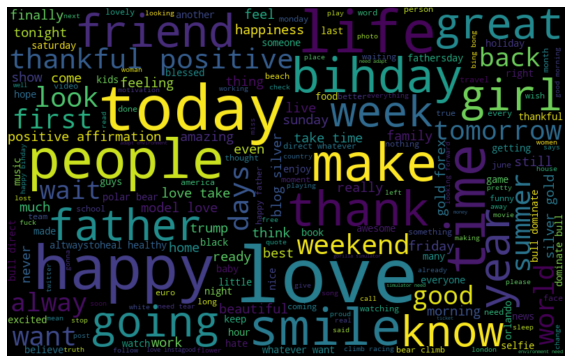

In [ ]:
all_words = ' '.join([text for text in df_full['clean']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

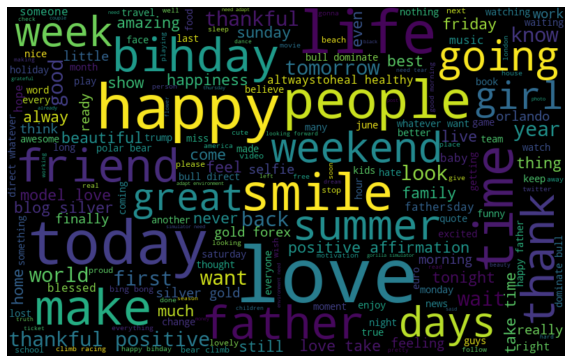

In [ ]:
normal_words =' '.join([text for text in df_full['clean'][df_full['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

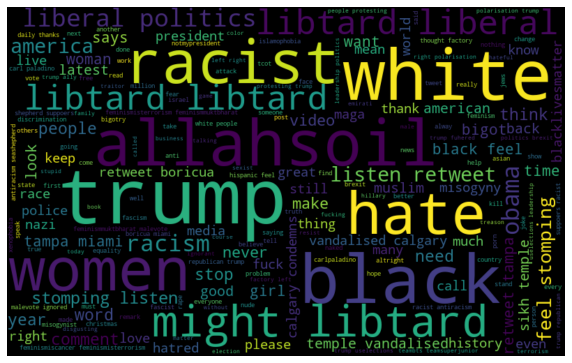

In [ ]:
negative_words = ' '.join([text for text in df_full['clean'][df_full['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Sentiment Analysis

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



In [ ]:
df_full['scores'] = df_full['clean'].apply(lambda x: vader.polarity_scores(x))
df_full.head(20)

#The score indicates neg for negative, neu for neutral, pos for positive, and finally the compound.
#the first row(id = 1) shows the tweet is 71.7% negative
#the compound value is basically the normal of the 3 values negative, positive and neutral

id  ...                                             scores
0    1  ...  {'neg': 0.717, 'neu': 0.283, 'pos': 0.0, 'comp...
1    2  ...  {'neg': 0.0, 'neu': 0.56, 'pos': 0.44, 'compou...
2    3  ...  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
3    4  ...  {'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'comp...
4    5  ...  {'neg': 0.0, 'neu': 0.455, 'pos': 0.545, 'comp...
5    6  ...  {'neg': 0.569, 'neu': 0.244, 'pos': 0.187, 'co...
6    7  ...  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
7    8  ...  {'neg': 0.236, 'neu': 0.764, 'pos': 0.0, 'comp...
8    9  ...  {'neg': 0.0, 'neu': 0.397, 'pos': 0.603, 'comp...
9   10  ...  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...
10  11  ...  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
11  12  ...  {'neg': 0.325, 'neu': 0.314, 'pos': 0.361, 'co...
12  13  ...  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
13  14  ...  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
14  15  ...  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
15  16  ...  {'neg': 0.452, 'neu': 0.548, 'pos': 0.0, 'comp...
16  17  ...  {'neg': 0.0, 'neu': 0.083, 'pos': 0.917, 'comp...
17  18  ...  {'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'comp...
18  19  ...  {'neg': 0.0, 'neu': 0.659, 'pos': 0.341, 'comp...
19  20  ...  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...

[20 rows x 6 columns]

## TF-IDF Features

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(df_full['clean'])

In [ ]:
print(tfidf)

  (0, 455)	0.7687234331695303
  (0, 272)	0.6395813343868398
  (1, 112)	0.7847596033328235
  (1, 868)	0.6198002621626659
  (2, 59)	1.0
  (3, 880)	0.558618590904529
  (3, 517)	0.45043396483142717
  (3, 559)	0.696458550972044
  (4, 570)	1.0
  (5, 482)	0.5261023840058076
  (5, 851)	0.5823627994903536
  (5, 415)	0.6197336938662962
  (6, 886)	1.0
  (7, 334)	0.26537145747834623
  (7, 426)	0.3811767835944723
  (7, 383)	0.28671960590771417
  (7, 872)	0.26144642124501505
  (7, 991)	0.5358544357455883
  (7, 742)	0.5887103781168356
  (8, 113)	0.9150239590735945
  (8, 517)	0.40339949717529977
  (9, 962)	1.0
  (10, 309)	0.3679573499287003
  (10, 344)	0.3586077523792084
  (10, 769)	0.3590229567297549
  :	:
  (49154, 484)	0.3337564644695362
  (49154, 659)	0.34852641421666836
  (49154, 874)	0.3518130102671316
  (49154, 87)	0.38017594324026943
  (49154, 903)	0.28930514944654223
  (49154, 721)	0.29019365146914555
  (49155, 957)	0.7287417282140612
  (49155, 279)	0.6847886488250104
  (49156, 920)	0.4845068

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_full['clean'])
print(vectorizer.get_feature_names())

print(X.shape)

['aaaaa', 'aaaaaand', 'aaaaah', 'aaaaand', 'aaaahhh', 'aaaahhhh', 'aaaannndd', 'aaahh', 'aaahhhh', 'aaahhhhh', 'aaand', 'aaawwwww', 'aaberg', 'aadityaji', 'aadmi', 'aakhri', 'aalivyahsimon', 'aaliyah', 'aamaadmipay', 'aameen', 'aameer', 'aamirkhan', 'aamusong', 'aande', 'aapi', 'aapka', 'aaptards', 'aarakshan', 'aarhus', 'aaron', 'aaronorentas', 'aaronrhodes', 'aarya', 'aaryn', 'aascf', 'aatmnirbhar', 'aayat', 'abaah', 'abadbateu', 'abandon', 'abandonded', 'abandoned', 'abandons', 'abang', 'abantu', 'abasel', 'abathingape', 'abba', 'abbey', 'abbibuckets', 'abbie', 'abbiemusic', 'abbotabad', 'abbott', 'abbu', 'abby', 'abbyybelle', 'abcdiscovers', 'abdalla', 'abdominal', 'abducted', 'abdul', 'abeed', 'abeer', 'abeg', 'abella', 'abenomics', 'aberdeen', 'aberrant', 'aberystwyth', 'abetting', 'abfabmovie', 'abfsecurity', 'abglp', 'abhi', 'abhishek', 'abiball', 'abiballkleid', 'abiding', 'abilities', 'ability', 'abiphillips', 'abitfitter', 'abitur', 'abject', 'able', 'ableg', 'ableism', 'abl

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
corpus = ["This is a sentence"]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

In [ ]:
vectorizer.fit(corpus)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [ ]:
corpus = ["this is a tweet", "this is a tweet", "ijeoma is great!", "this is a tweet about ijeoma"]

In [ ]:
vectorizer.fit(corpus)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [ ]:
transformed = vectorizer.transform(corpus)

In [ ]:
print(transformed.toarray())

[[0.         0.         0.         0.5004907  0.61217198 0.61217198]
 [0.         0.         0.         0.5004907  0.61217198 0.61217198]
 [0.         0.72664149 0.5728925  0.37919167 0.         0.        ]
 [0.60759891 0.         0.47903796 0.31707032 0.38782252 0.38782252]]


In [ ]:
#Spacy couldn't work on the clean column since it's a a list so it's been converted to string to enable spacy work on the column
list_to_str = ', '.join([str(i) for i in df_full['clean']])
list_to_str 

'father dysfunctional selfish drags kids dysfunction, thanks lyft credit cause offer wheelchair vans disapointed getthanked, bihday majesty, model love take time, factsguide society motivation, huge fare talking leave chaos disputes allshowandnogo, camping tomorrow danny, next school year year exams think school exams hate imagine actorslife revolutionschool girl, love land allin cavs champions cleveland clevelandcavaliers, welcome, ireland consumer price index climbed previous blog silver gold forex, selfish orlando standwithorlando pulseshooting orlandoshooting biggerproblems selfish heabreaking values love, daddy today days gettingfed, calls michigan middle school build wall chant tcot, comment australia opkillingbay seashepherd helpcovedolphins thecove helpcovedolphins, ouch junior angry junior yugyoem, thankful paner thankful positive, retweet agree, friday smiles around user cookies make people, know essential oils made chemicals, euro people blaming conceded goal rooney gave awa

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")
nlp.max_length = 2500000 #increase the length here because it takes only 1million words/tokens
doc = nlp(list_to_str)

for token in doc:
    print(token.text, token.pos_, token.dep_)
#the pos_ marks the core part-of-speech categories
#the dep_ indicates Syntactic dependency relation
#spacy.explain('PROPN')
#spacy.explain('dobj')

#All there can be found here https://spacy.io/usage/spacy-101 and https://spacy.io/api/token

Streaming output truncated to the last 5000 lines.
pitbulls NOUN compound
summer NOUN compound
terriers NOUN nsubj
pitbullmama PROPN ROOT
casa PROPN compound
dieter PROPN dobj
, PUNCT punct
save VERB conj
date NOUN compound
sourcenation NOUN dobj
live VERB ROOT
thependulum PROPN compound
newshow NOUN compound
policebrutality NOUN dobj
, PUNCT punct
broads NOUN nsubj
think VERB parataxis
self NOUN nsubj
esteem VERB npadvmod
willing ADJ nsubj
settle VERB ccomp
anything PRON dobj
smallminded VERB acl
, PUNCT punct
happy ADJ amod
saturday PROPN compound
saturday PROPN npadvmod
, PUNCT punct
weekend NOUN npadvmod
forget VERB ROOT
sign NOUN compound
fundraising NOUN compound
pack NOUN compound
suppo PROPN compound
jeansforgenes PROPN dobj
, PUNCT punct
getting VERB advcl
, PUNCT punct
badly ADV advmod
want VERB ccomp
today NOUN npadvmod
come VERB ccomp
, PUNCT punct
amala PROPN compound
lunch PROPN compound
church PROPN compound
father PROPN attr
, PUNCT punct
heafelt PROPN compound
condolen

In [ ]:
#Finding the shape of words to 
for token in doc:
    print(token.text, token.shape_, token.is_stop)

Streaming output truncated to the last 5000 lines.
pitbulls xxxx False
summer xxxx False
terriers xxxx False
pitbullmama xxxx False
casa xxxx False
dieter xxxx False
, , False
save xxxx False
date xxxx False
sourcenation xxxx False
live xxxx False
thependulum xxxx False
newshow xxxx False
policebrutality xxxx False
, , False
broads xxxx False
think xxxx False
self xxxx False
esteem xxxx False
willing xxxx False
settle xxxx False
anything xxxx True
smallminded xxxx False
, , False
happy xxxx False
saturday xxxx False
saturday xxxx False
, , False
weekend xxxx False
forget xxxx False
sign xxxx False
fundraising xxxx False
pack xxxx False
suppo xxxx False
jeansforgenes xxxx False
, , False
getting xxxx False
, , False
badly xxxx False
want xxxx False
today xxxx False
come xxxx False
, , False
amala xxxx False
lunch xxxx False
church xxxx False
father xxxx False
, , False
heafelt xxxx False
condolence xxxx False
goes xxxx False
family xxxx False
jazreel xxxx False
remains xxxx False
icon x

In [ ]:
from spacy import displacy
#displacy.render(doc)
#displacy.render(doc, style='dep') on jupyter notebook
#displacy.serve(doc, style="dep")

In [ ]:
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English
nlp = English()
# Create a blank Tokenizer with just the English vocab
tokenizer = Tokenizer(nlp.vocab)
tokenizer(list_to_str)

father dysfunctional selfish drags kids dysfunction, thanks lyft credit cause offer wheelchair vans disapointed getthanked, bihday majesty, model love take time, factsguide society motivation, huge fare talking leave chaos disputes allshowandnogo, camping tomorrow danny, next school year year exams think school exams hate imagine actorslife revolutionschool girl, love land allin cavs champions cleveland clevelandcavaliers, welcome, ireland consumer price index climbed previous blog silver gold forex, selfish orlando standwithorlando pulseshooting orlandoshooting biggerproblems selfish heabreaking values love, daddy today days gettingfed, calls michigan middle school build wall chant tcot, comment australia opkillingbay seashepherd helpcovedolphins thecove helpcovedolphins, ouch junior angry junior yugyoem, thankful paner thankful positive, retweet agree, friday smiles around user cookies make people, know essential oils made chemicals, euro people blaming conceded goal rooney gave away

In [ ]:
# Construction 2
from spacy.lang.en import English
nlp = English()
# Create a Tokenizer with the default settings for English
# including punctuation rules and exceptions
tokenizer = nlp.Defaults.create_tokenizer(nlp)

In [ ]:
def tokenize(sentence):
    sentence = nlp(sentence)
    # lemmatizing
    sentence = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in sentence ]
    # removing stop words
    sentence = [ word for word in sentence if word not in stop_words and word not in punctuations ]        
    return sentence

In [ ]:
import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
nlp = spacy.load('en')
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
parser = English()

# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = parser(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [ ]:
spacy_tokenizer(list_to_str)

ValueError: ignored

In [ ]:
tokens = tokenizer("This is a sentence")
assert len(tokens) == 4

In [ ]:
tokens

In [ ]:
type(tokens)

In [ ]:
token_list = list(tokens)

In [ ]:
tokenized_text = [str(token) for token in token_list]

In [ ]:
tokenized_text

In [ ]:
# https://spacy.io/usage/linguistic-features#lemmatization